In [1]:
from plot_params import * 
import numpy as np 

In [2]:
r_min = -2
r_max = 0.46
i_min = -1.12
i_max = 1.12
area_box = (r_max - r_min) * (i_max - i_min)

In [3]:
def check_inside_mandlebrot(c, max_num_checks):
    z = 0 + 0j
    for i in range(max_num_checks):
        z = np.square(z) + c
        if np.abs(z) > 2:
            return False
    return True

def area(area_box, inside_mandlebrot, outside_mandlebrot):
    num_inside = len(inside_mandlebrot)
    num_outside = len(outside_mandlebrot)

    fraction_inside = num_inside / (num_inside + num_outside)

    area_mandlebrot = fraction_inside * area_box
    return area_mandlebrot

def make_mandlebrot_lists(num_samples, max_num_checks):
    real = np.random.uniform(r_min, r_max, size=num_samples)
    imaginary = np.random.uniform(i_min, i_max, size=num_samples)

    random_complex_numbers = real + 1j * imaginary

    inside_mandlebrot = []
    outside_mandlebrot = []

    for z in random_complex_numbers:
        if check_inside_mandlebrot(z, max_num_checks):
            inside_mandlebrot.append(z)
        else:
            outside_mandlebrot.append(z)

    inside_mandlebrot = np.array(inside_mandlebrot)
    outside_mandlebrot = np.array(outside_mandlebrot)

    return inside_mandlebrot, outside_mandlebrot

In [4]:
i = 200
s = 50000
inside_mandlebrot, outside_mandlebrot = make_mandlebrot_lists(s, i)

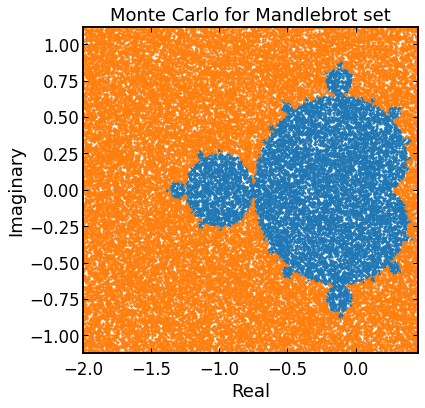

In [5]:
plt.scatter(np.real(inside_mandlebrot), np.imag(inside_mandlebrot), s=1)
plt.scatter(np.real(outside_mandlebrot), np.imag(outside_mandlebrot), s=1)
plt.xlim(-2, 0.46)
plt.ylim(-1.12, 1.12)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Monte Carlo for Mandlebrot set')
plt.show()

In [6]:
def mandlebrot_image_check(i, c):
    z = 0 + 0j
    for j in range(i):
        z = np.square(z) + c
        if np.abs(z) > 2:
            return j
    return 0

In [7]:
height = 500
width = 500
i = 25

arr = np.zeros((height, width, 1))

reals = np.linspace(r_min, r_max, width)
imags = np.linspace(i_min, i_max, height)

for k in range(width):
    for l in range(height):
        a = reals[k]
        b = imags[l]
        z = a + 1j * b
        n_checks = mandlebrot_image_check(i, z)
        arr[l][k] = n_checks

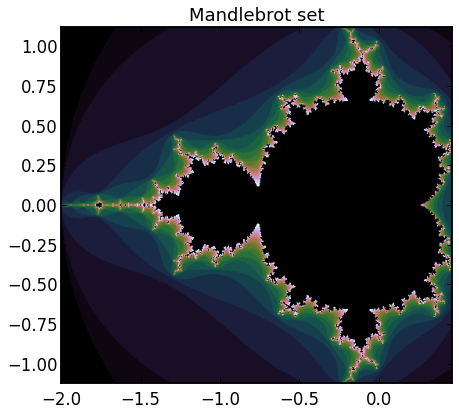

In [8]:
plt.figure(figsize=(7, 7))
plt.imshow(arr, extent=[r_min, r_max, i_min, i_max], cmap='cubehelix')
plt.title('Mandlebrot set')
plt.show()